In [20]:
# Import and preview the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("NHL All Time Point Leaders Feb 20 2024.xlsx")
df.head()

,Rk,Name,Born,Pos,GP,G,A,P,PIM,+/-,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,1,Wayne Gretzky,1961,F,1487,894,1963,2857,577,520.0,...,0.601,1.320,1.921,5083.0,17.6%,NaN,NaN,1199.0,1249.0,48.98%
1,2,Jaromír Jágr,1972,F,1733,766,1155,1921,1167,322.0,...,0.442,0.666,1.108,5637.0,13.6%,187.0,114.0,12.0,37.0,24.49%
2,3,Mark Messier,1961,F,1756,694,1193,1887,1912,211.0,...,0.395,0.679,1.075,4221.0,16.4%,NaN,NaN,5743.0,4755.0,54.71%
3,4,Gordie Howe,1928,F,1767,801,1049,1850,1685,160.0,...,0.453,0.594,1.047,3803.0,0.0%,NaN,NaN,NaN,NaN,NaN
4,5,Ron Francis,1963,F,1731,549,1249,1798,977,-18.0,...,0.317,0.722,1.039,3756.0,14.6%,NaN,NaN,4773.0,3940.0,54.78%


In [21]:
# Data Cleaning

# Step 1: Handle missing values -> Fill in numericals NaN columns with 0
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(0)

# Step 2: Ensuring correct data types
df['Born'] = df['Born'].astype(int)  
df['Pos'] = df['Pos'].astype(str) 

# Step 3: Convert percentage columns to numerical columns
for col in df.columns:
    if df[col].dtype == 'object' and df[col].str.contains('%', na=False).any():
        df[col] = df[col].str.replace('%', '', regex=True).astype(float)

df.head()

,Rk,Name,Born,Pos,GP,G,A,P,PIM,+/-,...,G/GP,A/GP,P/GP,SHOTS,SH%,HITS,BS,FOW,FOL,FO%
0,1,Wayne Gretzky,1961,F,1487,894,1963,2857,577,520.0,...,0.601,1.320,1.921,5083.0,17.6,0.0,0.0,1199.0,1249.0,48.98
1,2,Jaromír Jágr,1972,F,1733,766,1155,1921,1167,322.0,...,0.442,0.666,1.108,5637.0,13.6,187.0,114.0,12.0,37.0,24.49
2,3,Mark Messier,1961,F,1756,694,1193,1887,1912,211.0,...,0.395,0.679,1.075,4221.0,16.4,0.0,0.0,5743.0,4755.0,54.71
3,4,Gordie Howe,1928,F,1767,801,1049,1850,1685,160.0,...,0.453,0.594,1.047,3803.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5,Ron Francis,1963,F,1731,549,1249,1798,977,-18.0,...,0.317,0.722,1.039,3756.0,14.6,0.0,0.0,4773.0,3940.0,54.78


In [22]:
# EXPLANATORY DATA ANALYSIS

# Step 1: Summary Statistics
summ_stats = df[['G', 'A', 'P', 'SHOTS', 'SH%', 'PIM', 'FOW', 'FO%']].describe()
pos_stats = df.groupby("Pos")[['G', 'A', 'P', 'SHOTS', 'PIM', 'FOW', 'FO%']].mean()
print("Basic Summary Statistics:\n\n", summ_stats.round(2), "\n\n")
print("Position Based Summary Statistics:\n\n", pos_stats.round(2))

Basic Summary Statistics:

              G        A        P    SHOTS     SH%      PIM       FOW     FO%
count  1000.00  1000.00  1000.00  1000.00  958.00  1000.00   1000.00  613.00
mean    240.72   374.94   615.66  1924.66   11.22   651.49   1207.53   40.69
std     125.97   181.89   283.15   943.89    4.47   508.36   2519.50   18.02
min      43.00    89.00   332.00     0.00    0.00    24.00      0.00    0.00
25%     159.00   255.00   415.75  1360.00    8.90   303.00      0.00   34.77
50%     211.00   328.00   530.50  1774.00   12.10   506.50      2.00   44.76
75%     288.00   435.25   722.25  2395.00   14.10   825.50    676.50   50.00
max     894.00  1963.00  2857.00  6768.00   23.70  3971.00  15351.00  100.00 


Position Based Summary Statistics:

           G       A       P    SHOTS     PIM      FOW    FO%
Pos                                                         
D    127.06  404.95  532.01  1973.85  855.82     1.36  26.98
F    266.69  368.09  634.78  1913.41  604.80  1483.14  4

In [23]:
# Step 2: Scoring Statistics Over Time

# Estimate when the players started their career -> Only birth year is provided in the dataset
df["Debut_Year"] = df["Born"] + 20  # We estimate that mos careers started at age 20
df["Retire_Year"] = df["Debut_Year"] + (df["GP"] / 82)  # Eventhough this changed, we say that the average season was 82 games

# Now we find the decades in which they were playing
df['Decade'] = ((df["Debut_Year"] //10) * 10).astype(int)

# Display results
decade_stats = df.groupby("Decade")[["G", "A", "P"]].mean().reset_index()
print("\nScoring Trends Over Decades:\n")
print(decade_stats.round(2).to_string(index=False))


Scoring Trends Over Decades:

 Decade      G      A      P
   1910 237.50 113.50 351.00
   1920 215.73 207.45 423.18
   1930 193.86 254.10 447.95
   1940 230.74 331.09 561.83
   1950 254.20 377.80 632.00
   1960 242.19 372.42 614.62
   1970 243.40 365.45 608.85
   1980 265.14 430.62 695.76
   1990 245.43 387.78 633.21
   2000 235.84 378.98 614.82
   2010 209.49 329.46 538.94
   2020 119.67 225.67 345.33


In [24]:
# Step 3: Correlations

# FOW% vs Points, SH% vs Goals, Hits & PIM VS Points
correlation_fo_p = df[['FO%', 'P']].corr().iloc[0, 1]
correlation_sh_g = df[['SH%', 'G']].corr().iloc[0, 1]
correlation_hits_p = df[['HITS', 'P']].corr().iloc[0, 1]
correlation_pim_p = df[['PIM', 'P']].corr().iloc[0, 1]

# Display Results
print("Correlation between FOW% and Points:", correlation_fo_p.round(2))
print("Correlation between SH% and Goals:", correlation_sh_g.round(2))
print("Correlation between Hits and Points:", correlation_hits_p.round(2))
print("Correlation between PIM and Points:", correlation_pim_p.round(2))

Correlation between FOW% and Points: 0.14
Correlation between SH% and Goals: 0.34
Correlation between Hits and Points: -0.02
Correlation between PIM and Points: 0.25


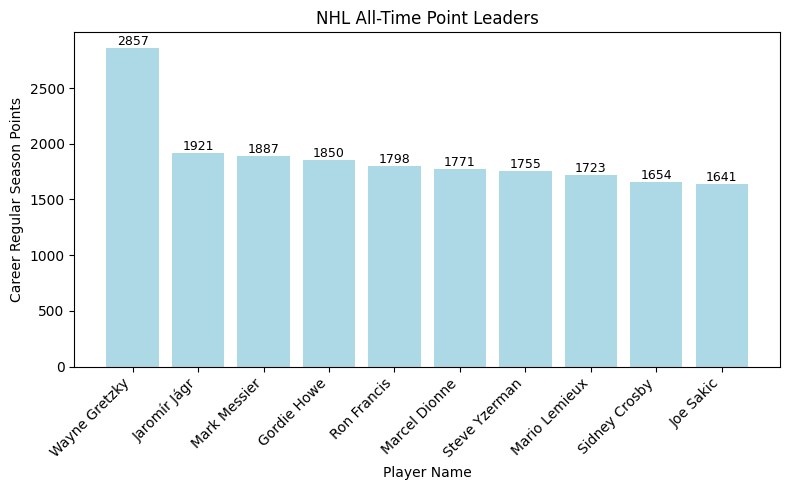

In [25]:
# DATA VISUALIZATION

# Bar Chart of All Time Point Leaders
top10 = df.sort_values(by='P', ascending=False).head(10)
plt.figure(figsize=(8,5))
bars = plt.bar(top10['Name'], top10['P'], color='lightblue')
plt.title('NHL All-Time Point Leaders')
plt.xlabel('Player Name')
plt.ylabel('Career Regular Season Points')
plt.xticks(rotation=45, ha='right')

# Add text labels on top of bars
for i in bars:
    yval = i.get_height()
    plt.text(i.get_x() + i.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

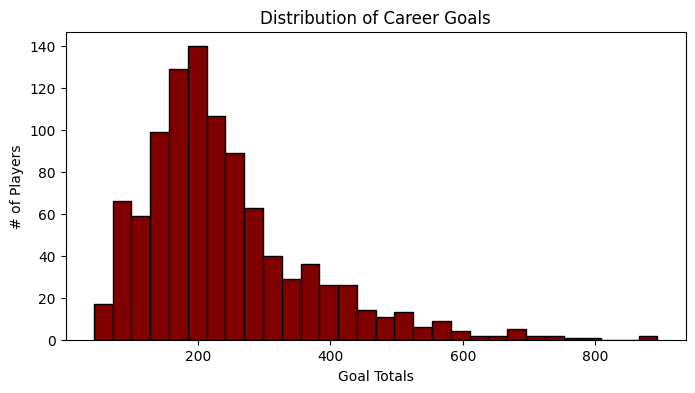

In [26]:
# Histogram Showing Goal Distributions
plt.figure(figsize=(8,4))
plt.hist(df['G'], bins=30, color='Maroon', edgecolor='black')
plt.title('Distribution of Career Goals')
plt.xlabel('Goal Totals')
plt.ylabel('# of Players')
plt.show()

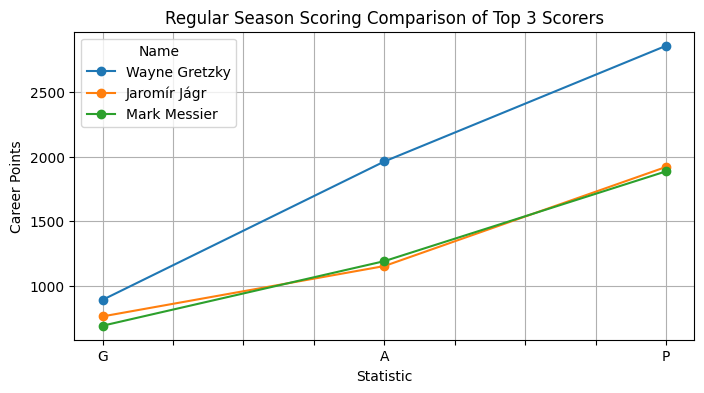

In [27]:
# Line Graph Showing Career Progression of Top 3 Scorers
top3 = ['Wayne Gretzky', 'Jaromír Jágr', 'Mark Messier']
progression = df[df['Name'].isin(top3)][['Name', 'G', 'A', 'P']]
progression.set_index('Name')[['G', 'A', 'P']].T.plot(figsize=(8,4), marker='o')
plt.title('Regular Season Scoring Comparison of Top 3 Scorers')
plt.xlabel('Statistic')
plt.ylabel('Career Points')
plt.grid(True)
plt.show()

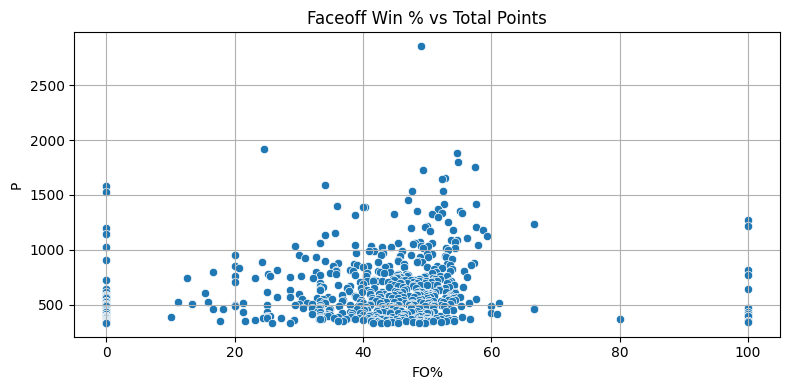

In [28]:
# Scatter Plots Showing Faceoff Win % vs Total Points
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='FO%', y='P')
plt.title('Faceoff Win % vs Total Points')
plt.grid(True)
plt.tight_layout()
plt.show()


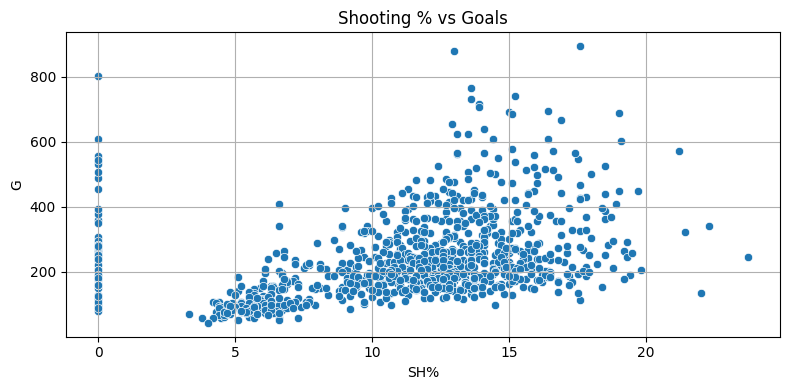

In [29]:
# Scatter Plot Showing Shooting % vs Goals
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='SH%', y='G')
plt.title('Shooting % vs Goals')
plt.grid(True)
plt.tight_layout()
plt.show()


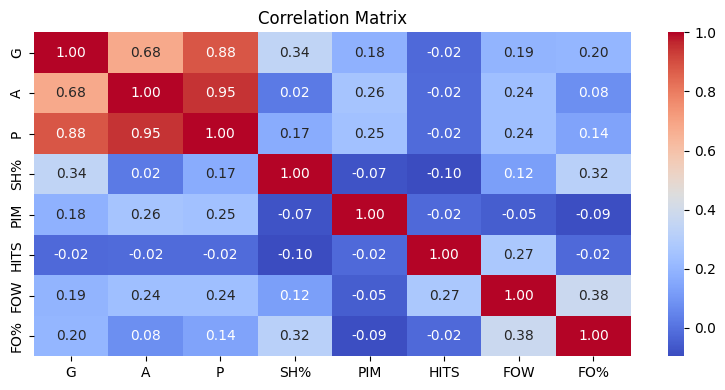

In [30]:
# 5. Heatmap: Correlation Matrix
plt.figure(figsize=(8,4))
correlation_matrix = df[['G','A','P','SH%','PIM','HITS','FOW','FO%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()